<a href="https://colab.research.google.com/github/Daniel-Page/tensorflow/blob/main/tensorflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# A Basic Tensor Flow Example
Opitcal Character Recognition (OCR)

Image --> Model --> Character

In [88]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np

print("TensorFlow version:", tf.__version__)

TensorFlow version: 2.8.2


### Import Dataset

In [89]:
# MNIST: a dataset of handwritten digits
# http://yann.lecun.com/exdb/mnist/
mnist = tf.keras.datasets.mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train = x_train / 255.0 # Int -> Float
x_test = x_test / 255.0 # Int -> Float

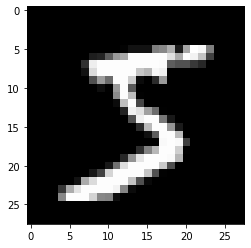

5


In [90]:
# Plots a single letter from the training set and prints the ground truth
plt.imshow(x_train[0], cmap=plt.get_cmap('gray')) 
plt.show()
print(y_train[0])

### Train Model

In [91]:
# Groups a linear stack of layers
model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)), # 28 x 28 pixels, 2D array flattened to single vector
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Dense(10)
])

# Logits: the vector of raw (non-normalised) predictions
# Single image indexed with x_train[:1]
# Multi-class classification problem because multiple letters possible
predictions = model(x_train[:1]).numpy()


# Converts logits to probabilities for each class
tf.nn.softmax(predictions).numpy()

# Loss function
loss_fn = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)
loss_fn(y_train[:1], predictions).numpy()


model.compile(optimizer='adam',
              loss=loss_fn,
              metrics=['accuracy'])

model.fit(x_train, y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2957 - accuracy: 0.9133
Epoch 2/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.1426 - accuracy: 0.9575
Epoch 3/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1080 - accuracy: 0.9673
Epoch 4/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0884 - accuracy: 0.9730
Epoch 5/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0750 - accuracy: 0.9759


### Test Model

313/313 - 1s - loss: 0.0722 - accuracy: 0.9788 - 678ms/epoch - 2ms/step


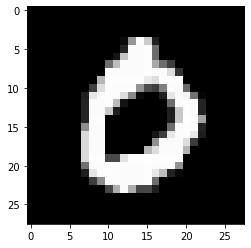

[0]


In [93]:
model.evaluate(x_test,  y_test, verbose=2)

test_case = x_test[3]

# Plots a single letter from the training set and prints the ground truth
plt.imshow(test_case, cmap=plt.get_cmap('gray')) 
plt.show()

predict_x = model.predict(np.array([test_case])) 
classes_x = np.argmax(predict_x, axis = 1)
print(classes_x)